In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()
! conda update -n base -c conda-forge conda
! pip install tdqm
! mamba install openmc
! wget -O - https://anl.box.com/shared/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz | tar -C /content/ -xJ

In [ ]:
%matplotlib inline
import openmc


In [ ]:

Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('O16', 0.118209, 'wo')
Fuel.add_nuclide('O17', 0.0003178557, 'wo')
Fuel.add_nuclide('U235', 0.0246812, 'wo')
Fuel.add_nuclide('U238', 0.856789, 'wo')
Fuel.set_density('g/cc', 10.5216)
Fuel.temperature = 923.15

helium = openmc.Material(name='He')
helium.add_element('He', 1)
helium.set_density('g/cc', 0.002)
helium.temperature = 623.15

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 593.15

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 583.15

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, helium, zirc4, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_channel=openmc.ZCylinder(r=.4095)
zero = openmc.ZPlane(z0=0)
fuel_top = openmc.ZPlane(z0=365.76)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_channel & -fuel_top & +zero)
helium_channel=openmc.ZCylinder(r=.4175)
he_top = openmc.ZPlane(z0=381.762)
helium_cell = openmc.Cell(fill=helium, region=+fuel_channel & -helium_channel & +zero & -he_top)
helium_2 = openmc.Cell(fill=helium, region=-fuel_channel & +fuel_top & -he_top)
zmax = openmc.ZPlane(z0=383.432, boundary_type='vacuum')
zmin = openmc.ZPlane(z0=-1.67, boundary_type='vacuum')
zirc_channel = openmc.ZCylinder(r=.4745)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_channel & -zirc_channel & +zmin & -zmax)
zirc_2 = openmc.Cell(fill=zirc4, region=-helium_channel & +he_top & -zmax)
zirc_3 = openmc.Cell(fill=zirc4, region=-helium_channel & -zero & +zmin)

pitch = 1.254
xmin = openmc.XPlane(-pitch/2, boundary_type='reflective')
xmax = openmc.XPlane(pitch/2, boundary_type='reflective')
ymin = openmc.YPlane(-pitch/2, boundary_type='reflective')
ymax = openmc.YPlane(pitch/2, boundary_type='reflective')

moderator_cell = openmc.Cell(fill=boratedwater, region=+xmin & -xmax & +ymin & -ymax & +zirc_channel & +zmin & -zmax)

root_universe = openmc.Universe(cells=[fuel_cell, helium_cell, helium_2, zirc_cell, zirc_2, zirc_3, moderator_cell])

main_cell = openmc.Cell(fill=root_universe, region=+xmin & -xmax & +ymin & -ymax & +zmin &-zmax)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

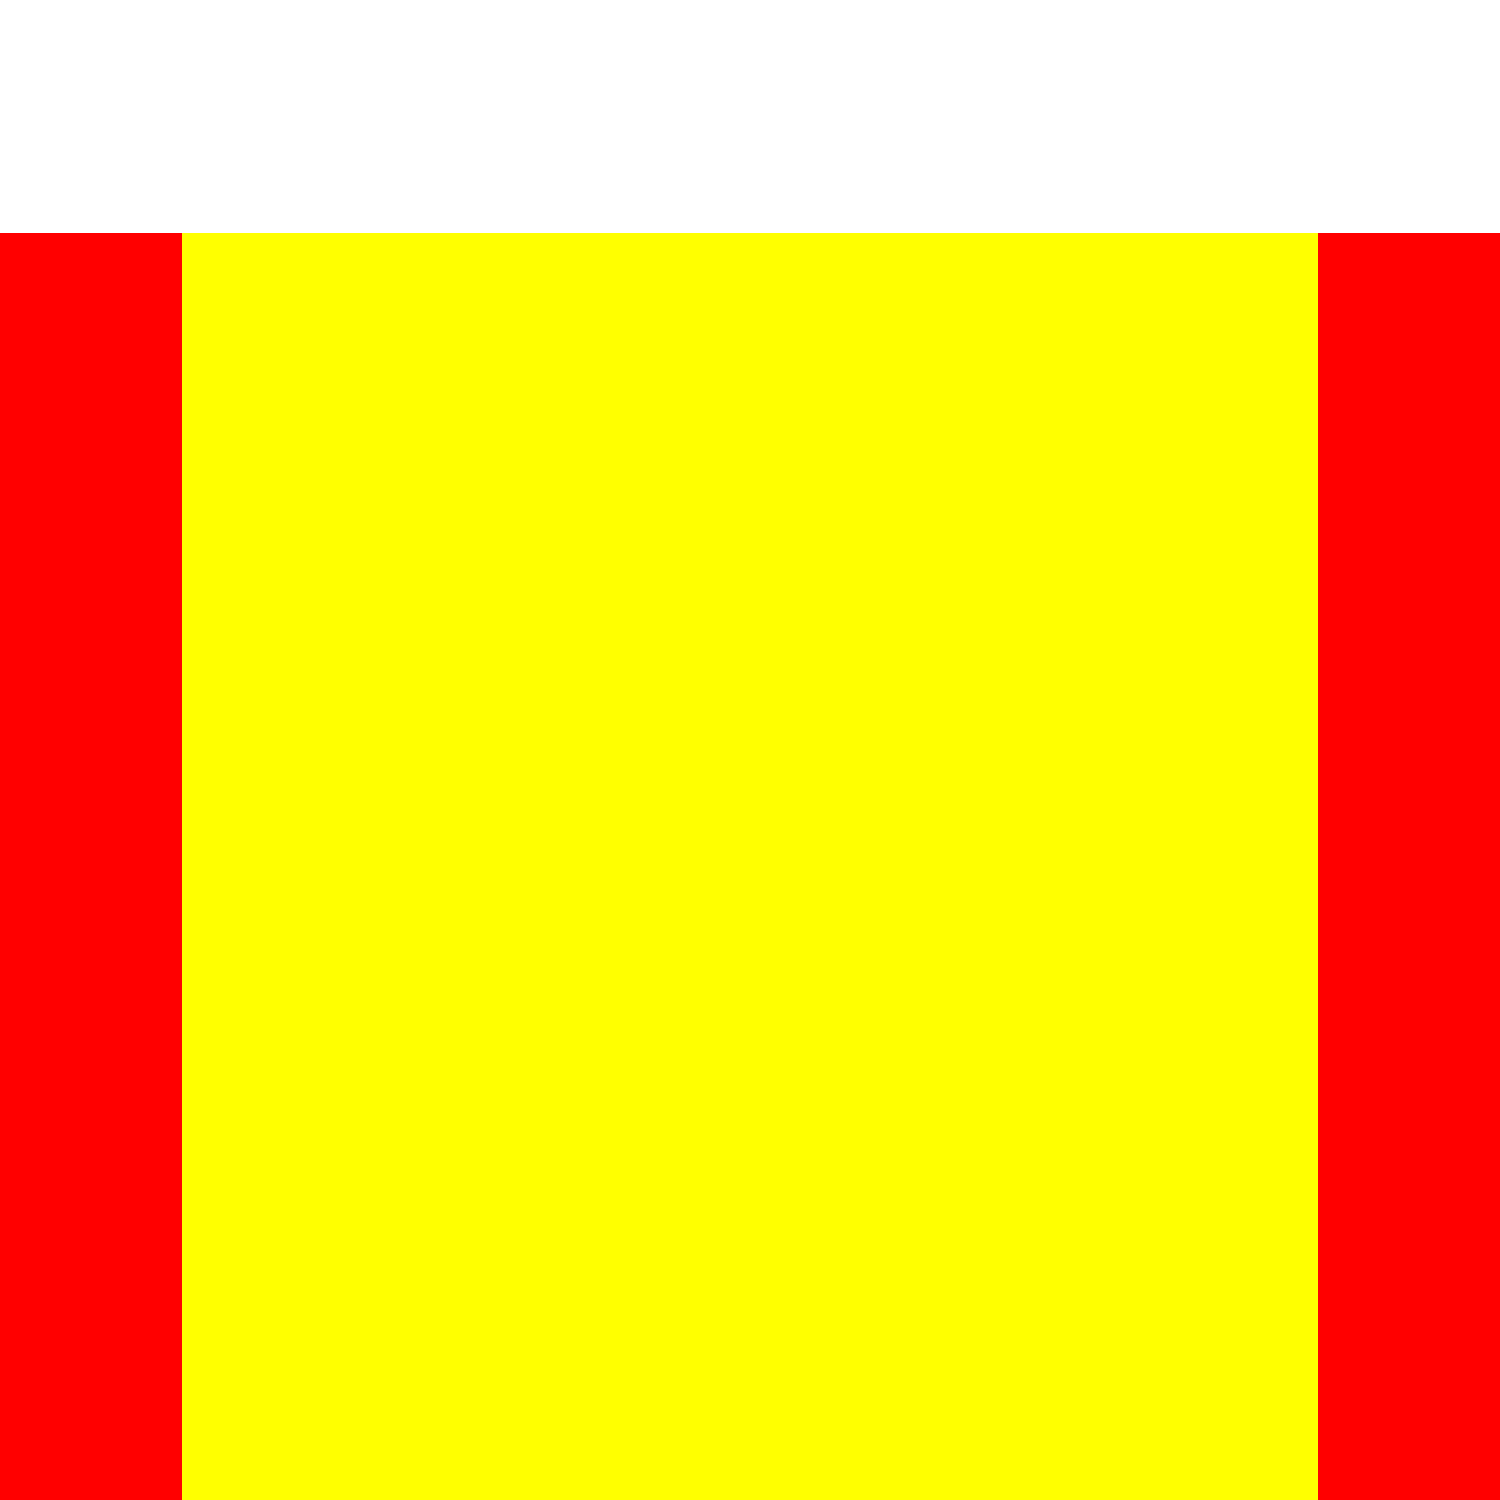

In [ ]:
plot = openmc.Plot.from_geometry(geometry)
plot.color_by = 'material'
plot.colors = colors = {
    Fuel: 'blue',
    helium: 'olive',
    zirc4: 'yellow',
    boratedwater: 'red'
}
plot.pixels = 1500,1500
plot.origin = 0,0,383
plot.basis = 'xz'
plot.to_ipython_image()

In [ ]:
# point = openmc.stats.Point((0, 0, 180))
# src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.run_mode = "eigenvalue"
# settings.source = src
settings.batches = 150
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.932)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.056)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 293

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=8.741, boundary_type='vacuum')
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)

root_universe = openmc.Universe(cells=[fuel_cell])

main_cell = openmc.Cell(fill=root_universe, region=-fuel_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
# Add nuclides to uo2
uo2 = openmc.Material(1, "uo2")
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.0)

zirconium = openmc.Material(name="zirconium")
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

water = openmc.Material(name="water")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
materials = openmc.Materials([uo2, zirconium, water])

materials.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials.export_to_xml()


fuel_outer_radius = openmc.ZCylinder(r=0.39)
clad_inner_radius = openmc.ZCylinder(r=0.40)
clad_outer_radius = openmc.ZCylinder(r=0.46)
fuel_region = -fuel_outer_radius
gap_region = +fuel_outer_radius & -clad_inner_radius
clad_region = +clad_inner_radius & -clad_outer_radius
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region

gap = openmc.Cell(name='air gap')
gap.region = gap_region

clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region
pitch = 1.26
left = openmc.XPlane(-pitch/2, boundary_type='reflective')
right = openmc.XPlane(pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top = openmc.YPlane(pitch/2, boundary_type='reflective')
water_region = +left & -right & +bottom & -top & +clad_outer_radius

moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region
box = openmc.rectangular_prism(width=pitch, height=pitch,
                               boundary_type='reflective')
water_region = box & +clad_outer_radius
root_universe = openmc.Universe(cells=(fuel, gap, clad, moderator))

geometry = openmc.Geometry()
geometry.root_universe = root_universe
geometry.export_to_xml()
# Create a point source
point = openmc.stats.Point((0, 0, 0))
source = openmc.Source(space=point)
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()

/usr/local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


In [ ]:
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <cross_sections>/content/endfb-vii.1-hdf5/cross_sections.xml</cross_sections>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material id="43" name="zirconium">
    <density units="g/cm3" value="6.6" />
    <nuclide ao="0.1715" name="Zr92" />
    <nuclide ao="0.1122" name="Zr91" />
    <nuclide ao="0.028" name="Zr96" />
    <nuclide ao="0.1738" name="Zr94" />
    <nuclide ao="0.5145" name="Zr90" />
  </material>
  <material id="44" name="water">
    <density units="g/cm3" value="1.0" />
    <nuclide ao="2.0" name="H1" />
    <nuclide ao="1.0" name="O16" />
    <sab name="c_H_in_H2O" />
  </material>
</materials>


In [ ]:
!rm geometry.xml

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Just sphere
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.932)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.056)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 293

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=8.741, boundary_type='vacuum')
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)

root_universe = openmc.Universe(cells=[fuel_cell])

main_cell = openmc.Cell(fill=root_universe, region=-fuel_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#add water change temperatures
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.932)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.056)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 400

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 400

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='vacuum')
water_cell = openmc.Cell(fill=boratedwater, region=+fuel_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#boundary type
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.932)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.056)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 400

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 400

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+fuel_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#Enrichment
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 400

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 400

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+fuel_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#add zirc change temperatures
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
zirc_sphere=openmc.Sphere(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+fuel_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#Change dimensions
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=4)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
zirc_sphere=openmc.Sphere(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+fuel_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#Change dimensions again
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=2.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
zirc_sphere=openmc.Sphere(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+fuel_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
#Add helium 1.1227 v 1.1268
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=2.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.Sphere(r=4)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.Sphere(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Spheres to cylinders 1.653 vs 1.658 (OpenMC first)
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=2.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=4)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.ZCylinder(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#match pincell radii 1.91821 v 1.92298
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=.4095)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=.4175)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=.4745)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.ZCylinder(r=.627, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#match enrichment  1.02465 v 1.0632 ***1.0270 CE
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.022)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.966)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=.4095)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=.4175)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=.4745)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.ZCylinder(r=.627, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Enrichment sphere again 1.14926 v 1.1530
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 400

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 400

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+fuel_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Add spheres all materials change enrichment .62341 v .6290
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=2.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.Sphere(r=4)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.Sphere(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Spheres to cylinders enrichment .96104 v .9677
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=2.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=4)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=8)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.ZCylinder(r=8.741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Spheres to cylinders radii 1.10945 v 1.1482
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=.4095)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=.4175)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=.4745)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.ZCylinder(r=.627, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#smaller spheres 1.19496 v 1.2245 ****1.1968 CE
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.Sphere(r=.6)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.Sphere(r=.7)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=.8, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#smaller spheres high enrichment 1.91195 v 1.9192
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.732)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.256)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=.5)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.Sphere(r=.6)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.Sphere(r=.7)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
water_sphere=openmc.Sphere(r=.8, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Enrichment sphere 0.08343 v 0.08441 vac
# reflective 2.03848 v 2.0385
#low enrichment 1.14051 v 1.1748 ***1.142 CE
#better stats 1.14094 v 1.17448
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 400

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 400

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=.7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
water_sphere=openmc.Sphere(r=.8741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+fuel_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 300
settings.inactive = 150
settings.particles = 50000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#Enrichment sphere  1.0847 1.116, .6700 .6721
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.032)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.956)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 400

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 400

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.Sphere(r=.7)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
water_sphere=openmc.Sphere(r=.8741, boundary_type='reflective')
water_cell = openmc.Cell(fill=boratedwater, region=+fuel_sphere & -water_sphere)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell])

main_cell = openmc.Cell(fill=root_universe, region=-water_sphere)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#match enrichment  1.0464 v  1.0501 CE
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.022)
Fuel.add_nuclide('U234', 0.01)
Fuel.add_nuclide('U236', 0.002)
Fuel.add_nuclide('U238', 0.966)
Fuel.set_density('g/cc', 18.76)
Fuel.temperature = 600

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 600

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 600

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 600

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=.4095)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=.4175)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=.4745)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
# water_sphere=openmc.ZCylinder(r=.627, boundary_type='reflective')

pitch = 1.254
xmin = openmc.XPlane(-pitch/2, boundary_type='reflective')
xmax = openmc.XPlane(pitch/2, boundary_type='reflective')
ymin = openmc.YPlane(-pitch/2, boundary_type='reflective')
ymax = openmc.YPlane(pitch/2, boundary_type='reflective')

water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & +xmin & -xmax & +ymin & -ymax)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=+xmin & -xmax & +ymin & -ymax)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#  1.0464 v  1.0501 CE
#w/ density 1.19413 v 1.1950
Fuel =openmc.Material(name='Fuel')
Fuel.add_nuclide('U235', 0.028)
Fuel.add_nuclide('U238', 0.972)
Fuel.set_density('g/cc', 10.96)
Fuel.temperature = 923.15

helium = openmc.Material(name='He')
helium.add_element('He', 2)
helium.set_density('g/cc', 0.002)
helium.temperature = 623.15

zirc4=openmc.Material(name='zirc4')
zirc4.add_nuclide('O16', 0.001196, 'wo')
zirc4.add_element('Cr', 0.000997, 'wo')
zirc4.add_element('Fe', 0.001994, 'wo')
zirc4.add_element('Zr', 0.981858, 'wo')
zirc4.add_element('Sn', 0.013955, 'wo')
zirc4.set_density('g/cc', 6.56)
zirc4.temperature = 593.15

boratedwater=openmc.Material(name='boratedwater')
boratedwater.add_nuclide('O16', 0.887606, 'wo')
boratedwater.add_nuclide('H1', 0.111394, 'wo')
boratedwater.add_element('B', 0.001, 'wo')
boratedwater.add_s_alpha_beta('c_H_in_H2O')
boratedwater.set_density('g/cc', 0.7)
boratedwater.temperature = 583.15

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([Fuel, boratedwater, zirc4, helium])
materials_file.cross_sections = "/content/endfb-vii.1-hdf5/cross_sections.xml"
materials_file.export_to_xml()


#define regions
fuel_sphere=openmc.ZCylinder(r=.4095)
fuel_cell = openmc.Cell(fill=Fuel, region=-fuel_sphere)
helium_sphere=openmc.ZCylinder(r=.4175)
helium_cell = openmc.Cell(fill=helium, region=+fuel_sphere & -helium_sphere)
zirc_sphere=openmc.ZCylinder(r=.4745)
zirc_cell = openmc.Cell(fill=zirc4, region=+helium_sphere & -zirc_sphere)
# water_sphere=openmc.ZCylinder(r=.627, boundary_type='reflective')

pitch = 1.254
xmin = openmc.XPlane(-pitch/2, boundary_type='reflective')
xmax = openmc.XPlane(pitch/2, boundary_type='reflective')
ymin = openmc.YPlane(-pitch/2, boundary_type='reflective')
ymax = openmc.YPlane(pitch/2, boundary_type='reflective')

water_cell = openmc.Cell(fill=boratedwater, region=+zirc_sphere & +xmin & -xmax & +ymin & -ymax)

root_universe = openmc.Universe(cells=[fuel_cell, water_cell, zirc_cell, helium_cell])

main_cell = openmc.Cell(fill=root_universe, region=+xmin & -xmax & +ymin & -ymax)

geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.temperature = {'method': 'interpolation'}
settings.source = src
settings.batches = 100
settings.inactive = 50
settings.particles = 10000
settings.export_to_xml()

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################